In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_city_ride = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
# Display the data table for preview
combined_city_ride.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

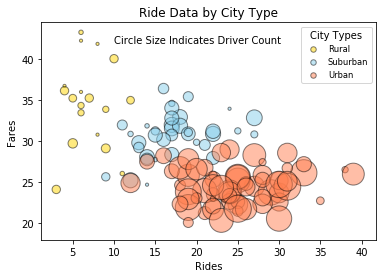

In [23]:
# Obtain the x and y coordinates for each of the three city types
Rural_cities = combined_city_ride[combined_city_ride["type"]=="Rural"]
Suburban_cities = combined_city_ride[combined_city_ride["type"]=="Suburban"]
Urban_cities = combined_city_ride[combined_city_ride["type"]=="Urban"]
# Build the scatter plots for each city types
Rural_ride_count = Rural_cities.groupby(["city"]).count()["ride_id"]
Rural_ride_avg_fare = Rural_cities.groupby(["city"]).mean()["fare"]
Rural_driver_count = Rural_cities.groupby(["city"]).mean()["driver_count"]

Suburban_ride_count = Suburban_cities.groupby(["city"]).count()["ride_id"]
Suburban_ride_avg_fare = Suburban_cities.groupby(["city"]).mean()["fare"]
Suburban_driver_count = Suburban_cities.groupby(["city"]).mean()["driver_count"]

Urban_ride_count = Urban_cities.groupby(["city"]).count()["ride_id"]
Urban_ride_avg_fare = Urban_cities.groupby(["city"]).mean()["fare"]
Urban_driver_count = Urban_cities.groupby(["city"]).mean()["driver_count"]


# Incorporate the other graph properties
plt.scatter(Rural_ride_count, Rural_ride_avg_fare, s=10*Rural_driver_count, c="gold", alpha=0.5, label="Rural", edgecolor="black", linewidths=1, marker="o",)
plt.scatter(Suburban_ride_count, Suburban_ride_avg_fare, s=10*Suburban_driver_count, c="skyblue", alpha=0.5, label="Suburban", edgecolor="black", linewidths=1, marker="o",)
plt.scatter(Urban_ride_count, Urban_ride_avg_fare, s=10*Urban_driver_count, c="coral", alpha=0.5, label="Urban", edgecolor="black", linewidths=1, marker="o",)


plt.ylabel("Fares")
plt.xlabel("Rides")
plt.title("Ride Data by City Type")

plt.text(10, 42, "Circle Size Indicates Driver Count")

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/City_ride_scatter.png")
plt.show()

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

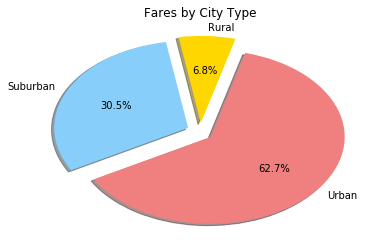

In [3]:
# Calculate Ride Percents
fare_type_percents = 100 * combined_city_ride.groupby(["type"]).sum()["fare"] / combined_city_ride["fare"].sum()
# Build Pie Chart
plt.pie(fare_type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=75, 
        colors =  ['gold', 'lightskyblue', 'lightcoral'],
        explode=[0.1, 0.1, 0.1], )
plt.title("Fares by City Type")
# Save Figure
plt.savefig("../Images/fares_by_city_type.png")
plt.show()            

## Total Rides by City Type

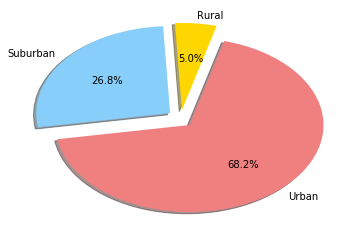

In [5]:
# Calculate Ride Percents
ride_type_percents = 100 * combined_city_ride.groupby(["type"]).sum()["ride_id"] / combined_city_ride["ride_id"].sum()
# Build Pie Chart

plt.pie(ride_type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=75, 
        colors =  ['gold', 'lightskyblue', 'lightcoral'],
        explode=[0.1, 0.1, 0.1], )
# Save Figure
plt.savefig("../Images/rides_by_city_type.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

NameError: name 'ax' is not defined

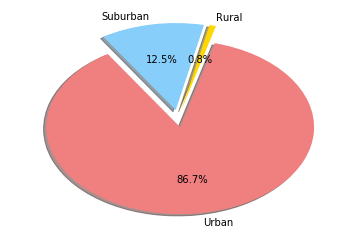

In [7]:
# Calculate Driver Percents
driver_type_percents = 100 * combined_city_ride.groupby(["type"]).sum()["driver_count"] / combined_city_ride["driver_count"].sum()
# Build Pie Charts
plt.pie(driver_type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=75, 
        colors =  ['gold', 'lightskyblue', 'lightcoral'],
        explode=[0.1, 0.1, 0.1], )

# Save Figure
plt.savefig("../Images/drivers_by_city_type.png")
plt.show()

In [ ]:
# Show Figure
plt.show()